<a href="https://colab.research.google.com/github/TTKhang1808/khang/blob/main/maskrcnn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/thesis/2nd_model

/content/drive/MyDrive/thesis/2nd_model


In [ ]:
!git clone https://github.com/SriRamGovardhanam/wastedata-Mask_RCNN-multiple-classes.git


fatal: destination path 'wastedata-Mask_RCNN-multiple-classes' already exists and is not an empty directory.


In [ ]:
!pip install keras==2.2.5
!pip install tensorflow==1.13.1

     |████████████████████████████████| 336 kB 15.5 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.2.5 which is incompatible.
     |████████████████████████████████| 92.6 MB 120 kB/s 
     |████████████████████████████████| 3.2 MB 41.1 MB/s 
     |████████████████████████████████| 367 kB 75.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimato

In [ ]:
!pip install h5py==2.10.0
!pip install mrcnn
!pip install git+https://github.com/waleedka/coco.git#subdirectory=PythonAPI
!pip install scikit-image==0.16.2
!pip install opencv-python
!pip install imgaug
!pip install IPython

     |████████████████████████████████| 2.9 MB 14.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 51 kB 260 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54932 sha256=46d487cdf314a0b70b399620183909f008546c5beec981eddbf4a1fe894f7296
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn
  Cloning https://github.com/waleedka/coco.git to /tmp/pip-req-build-9uk8bcha
  Running command git clone -q https://github.com/waleedka/coco.git /tmp/pip-req-build-9uk8bcha
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264157 sha256=5beaf3fcd3960f85e89acc176407687a64014e12b97b026e9c8e869804ebc3b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-fganckd0/wheels/26/53/cb/6a7cdd6bcb0f192dead045f897d3d4e05641492181968

In [ ]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
from mrcnn.visualize import display_instances
import matplotlib.pyplot as plt
import random
import math
import skimage.io
import matplotlib
# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils
# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Directory to save logs and model checkpoints
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")
class CustomConfig(Config):
    """Configuration for training on the dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"
    
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + (Horse and Man)
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    # Skip detections with <60% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load a subset of the Horse-Man dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("object", 1, "fault")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)
        annotations1 = json.load(open(os.path.join(dataset_dir, "/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/dataset/train/via_project_23Mar2022_22h27m_json.json")))
        # print(annotations1)
        annotations = list(annotations1.values())  
        annotations = [a for a in annotations if a['regions']]
        
        # Add images
        for a in annotations:

            polygons = [r['shape_attributes'] for r in a['regions']] 
            rect = [r['shape_attributes'] for r in a['regions']] 
            objects = [s['region_attributes']['name'] for s in a['regions']]
            print("objects:",objects)
            name_dict = {"fault": 1}
            # key = tuple(name_dict)
            num_ids = [name_dict[a] for a in objects]
            print("numids",num_ids)
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "object",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids,
                rect=rect
                )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a Horse/Man dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
              rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
        mask[rr, cc, i] = 1
        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids #np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [ ]:
def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = CustomDataset()
    dataset_train.load_custom("/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/dataset", "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = CustomDataset()
    dataset_val.load_custom("/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/dataset", "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=10,
                layers='heads')

In [ ]:
config = CustomConfig()
model = modellib.MaskRCNN(mode="training", config=config, model_dir=DEFAULT_LOGS_DIR)

weights_path = COCO_WEIGHTS_PATH
        # Download weights file
if not os.path.exists(weights_path):
  utils.download_trained_weights(weights_path)

model.load_weights('/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/mask_rcnn_coco.h5', by_name=True ,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask", "rpn_model"])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
train(model)

objects: ['fault', 'fault']
numids [1, 1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault', 'fault']
numids [1, 1]
objects: ['fault', 'fault']
numids [1, 1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
obje

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
100/100 [==============================] - 7099s 71s/step - loss: 1.8198 - rpn_class_loss: 0.0909 - rpn_bbox_loss: 1.2378 - mrcnn_class_loss: 0.0388 - mrcnn_bbox_loss: 0.3211 - mrcnn_mask_loss: 0.1313 - val_loss: 2.1299 - val_rpn_class_loss: 0.0459 - val_rpn_bbox_loss: 1.6940 - val_mrcnn_class_loss: 0.0057 - val_mrcnn_bbox_loss: 0.2276 - val_mrcnn_mask_loss: 0.1568
Epoch 2/10
100/100 [==============================] - 7075s 71s/step - loss: 1.2516 - rpn_class_loss: 0.0493 - rpn_bbox_loss: 0.8050 - mrcnn_class_loss: 0.0085 - mrcnn_bbox_loss: 0.2309 - mrcnn_mask_loss: 0.1579 - val_loss: 1.6323 - val_rpn_class_loss: 0.0526 - val_rpn_bbox_loss: 0.9092 - val_mrcnn_class_loss: 0.0145 - val_mrcnn_bbox_loss: 0.4704 - val_mrcnn_mask_loss: 0.1855
Epoch 3/10
100/100 [==============================] - 7010s 70s/step - loss: 1.2899 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.6274 - mrcnn_class_loss: 0.0250 - mrcnn_bbox_loss: 0.3310 - mrcnn_mask_loss: 0.2712 - val_loss: 1.2538 - val_rpn_c

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Root directory of the project
#ROOT_DIR = os.path.abspath("/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
%matplotlib inline
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
WEIGHTS_PATH = "/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/logs/object20220324T0918/mask_rcnn_object_0010.h5"  # TODO: update this path

In [ ]:
config = CustomConfig()
CUSTOM_DIR = os.path.join(ROOT_DIR, "/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/dataset")
class InferenceConfig(config.__class__):
  # Run detection on one image at a time
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1
  DETECTION_MIN_CONFIDENCE = 0.7
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [ ]:
# Device to load the neural network on. Useful if you're training a model on the same machine, in which case use CPU and leave the GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
# Inspect the model in training or inference modes values: 'inference' or 'training'
TEST_MODE = "inference"
def get_ax(rows=1, cols=1, size=13):
 # ""Return a Matplotlib Axes array to be used in all visualizations in the notebook. Provide a central point to control graph sizes. Adjust the size attribute to control how big to render images""
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax

# Load validation dataset
CUSTOM_DIR = "/content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/dataset"
dataset = CustomDataset()
dataset.load_custom(CUSTOM_DIR, "val")
# Must call before using the dataset
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

objects: ['fault', 'fault']
numids [1, 1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault', 'fault']
numids [1, 1]
objects: ['fault', 'fault']
numids [1, 1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
objects: ['fault']
numids [1]
obje

In [ ]:
#LOAD MODEL
# Create model in inference mode
with tf.device(DEVICE):
  model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

Instructions for updating:
Use tf.cast instead.


In [ ]:
# Load COCO weights Or, load the last model you trained
weights_path = WEIGHTS_PATH
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/logs/object20220324T0918/mask_rcnn_object_0010.h5
Re-starting from epoch 10


In [ ]:
class_names = ['BG','fault']

12
image ID: object.img12.png (12) /content/drive/MyDrive/thesis/2nd_model/Mask_RCNN/dataset/val/img12.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


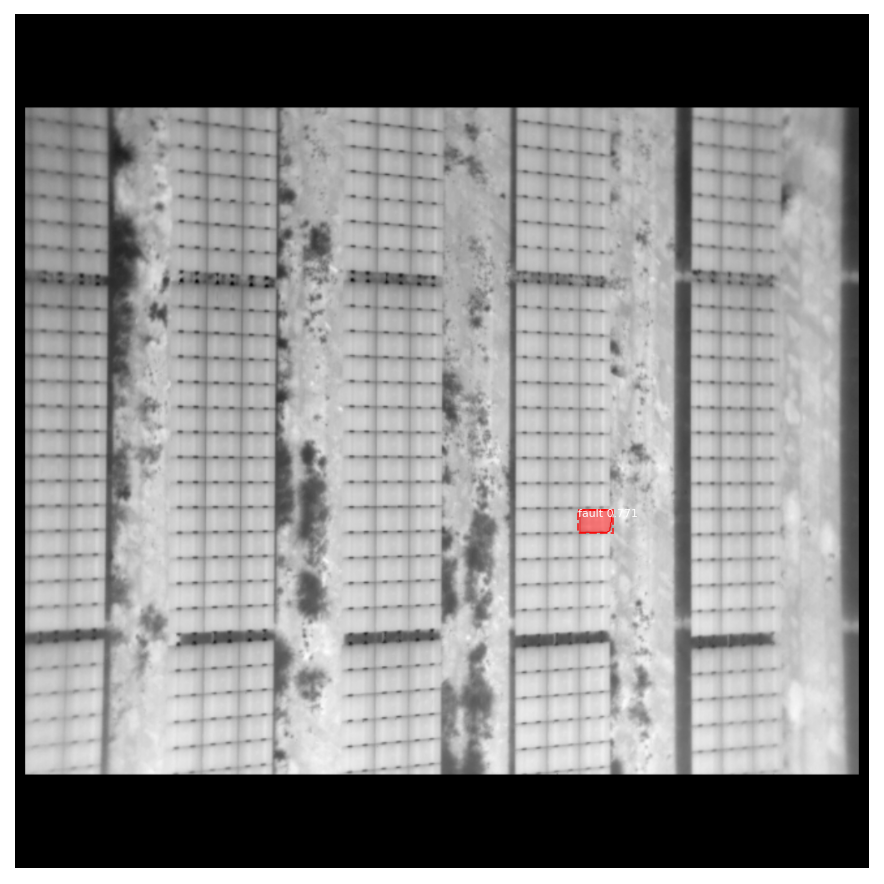

[594 675 621 717]
fault


Text(0.5, 1.0, 'original mask')

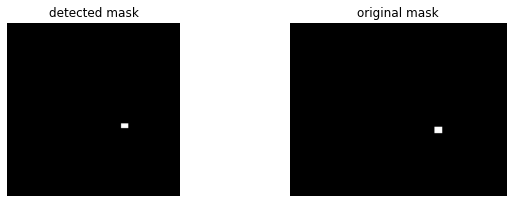

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#RUN DETECTION
image_id = 12
print(image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
  modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)
# Display results
#x = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
print(r['rois'][0])
print(class_names[r['class_ids'][0]])

tmp = np.zeros(image.shape[:2], np.uint8)
for bbox in r['rois']:
  p1=tuple(bbox[:2])[::-1]
  p2=tuple(bbox[2:][::-1])
  cv2.rectangle(tmp,p1,p2,(255,255,255),-1)
  #cv2_imshow(tmp)
  cv2.imwrite("/content/drive/MyDrive/filename.jpg",tmp)
"""
##export bounding box
tmp1 = np.zeros(image.shape[:2], np.uint8)
for bbox in r['rois']:
  p1=tuple(bbox[:2])[::-1]
  p2=tuple(bbox[2:][::-1])
  cv2.rectangle(tmp1,p1,p2,(255,100,255),1)
  cv2_imshow(tmp1)
  cv2.imwrite("/content/drive/MyDrive/filename1.jpg",tmp1)
"""
tmp2=cv2.imread('/content/drive/MyDrive/thesis/2nd_model/gray/mask12.png')
#cv2_imshow(tmp2)
cv2.imwrite("/content/drive/MyDrive/filename2.jpg",tmp2)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
#image0=cv2.imread('/content/drive/MyDrive/filename0.jpg')
image1=cv2.imread('/content/drive/MyDrive/filename.jpg')
image2=cv2.imread('/content/drive/MyDrive/filename2.jpg')
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image1)
plt.axis('off')
plt.title("detected mask")

fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(image2)
plt.axis('off')
plt.title("original mask")

In [ ]:
print(r['rois'][0])
print(class_names[r['class_ids'][0]])

[884 459 911 504]
fault


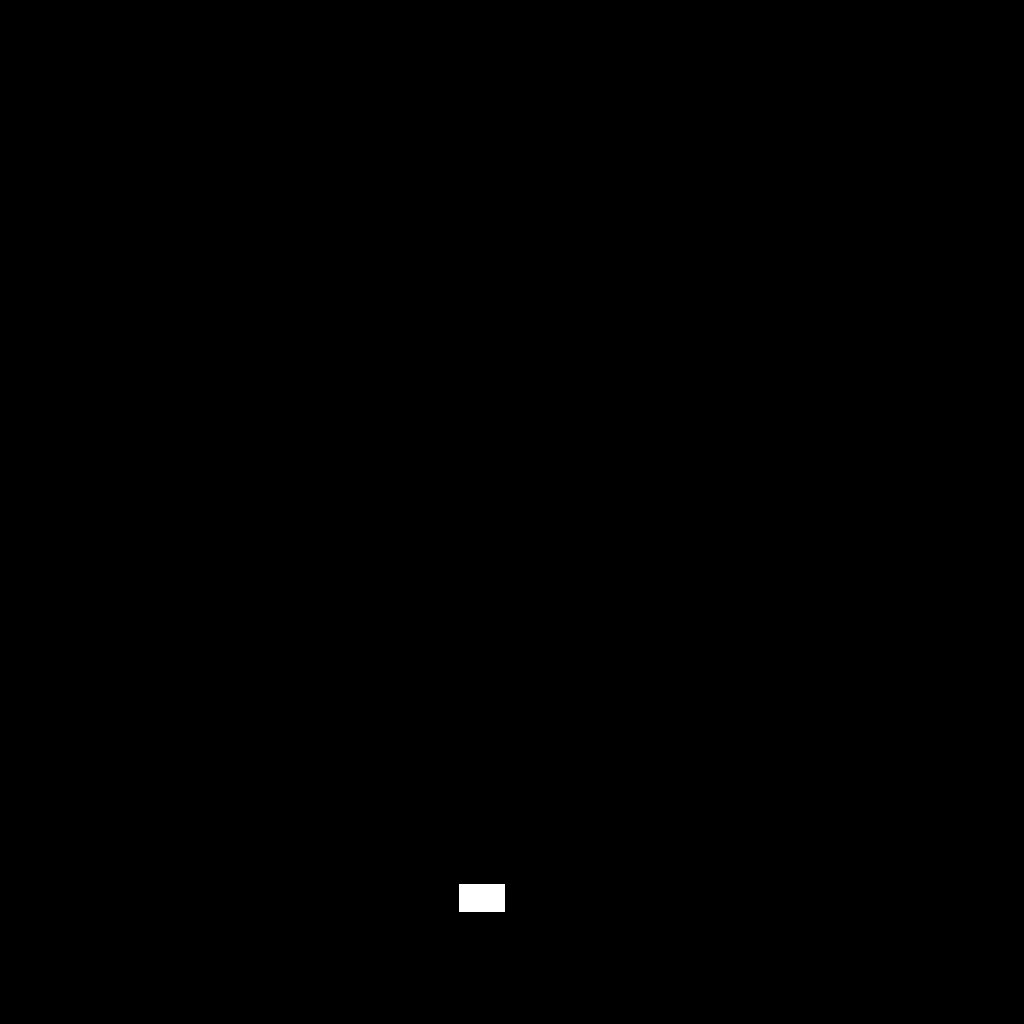

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

tmp = np.zeros(image.shape[:2], np.uint8)
for bbox in r['rois']:
  p1=tuple(bbox[:2])[::-1]
  p2=tuple(bbox[2:][::-1])
  cv2.rectangle(tmp,p1,p2,(255,255,255),-1)
  cv2_imshow(tmp)
  cv2.imwrite("/content/drive/MyDrive/filename.jpg",tmp)

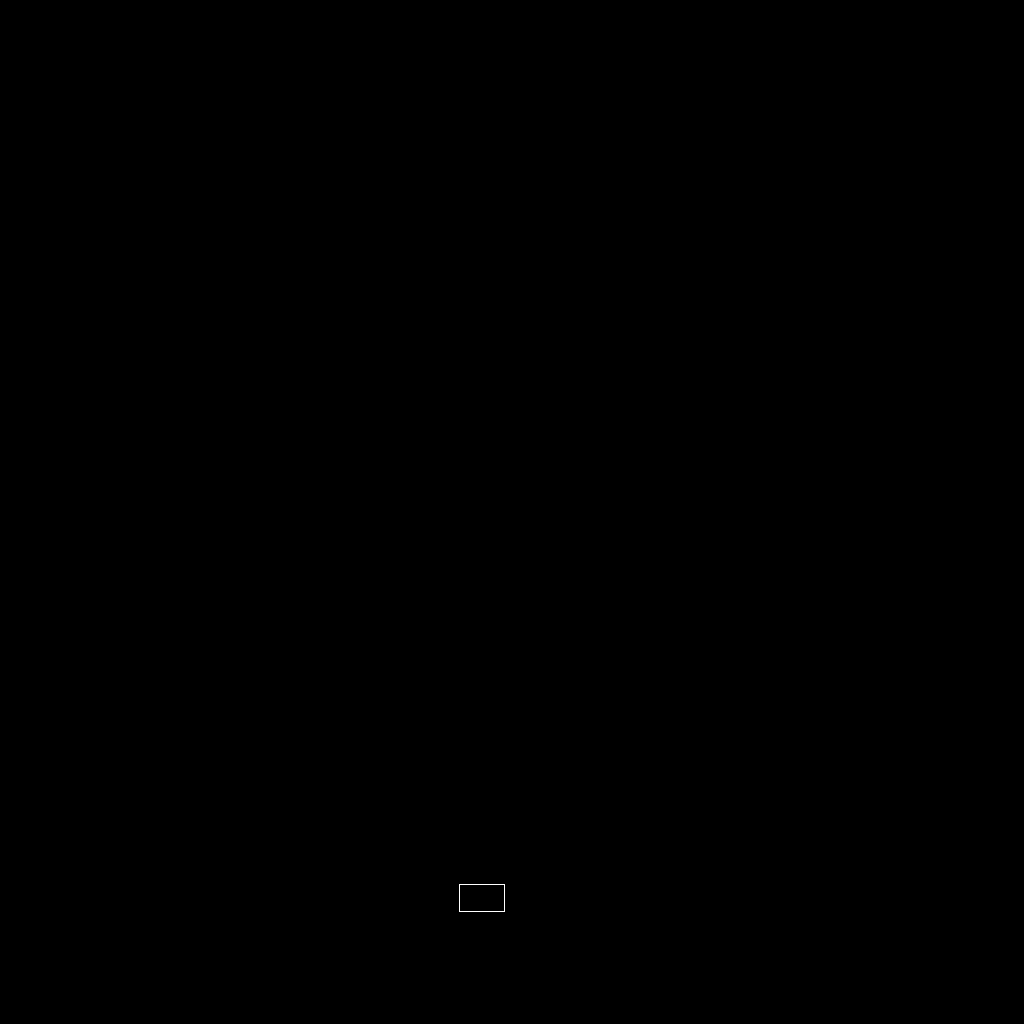

In [ ]:
tmp1 = np.zeros(image.shape[:2], np.uint8)
for bbox in r['rois']:
  p1=tuple(bbox[:2])[::-1]
  p2=tuple(bbox[2:][::-1])
  cv2.rectangle(tmp1,p1,p2,(255,100,255),1)
  cv2_imshow(tmp1)
  cv2.imwrite("/content/drive/MyDrive/filename1.jpg",tmp1)

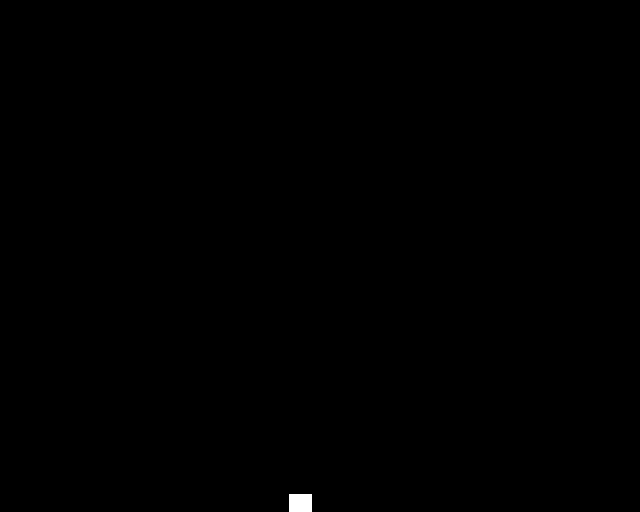

True

In [ ]:
tmp2=cv2.imread('/content/drive/MyDrive/thesis/2nd_model/gray/mask22.png')
cv2_imshow(tmp2)
cv2.imwrite("/content/drive/MyDrive/filename2.jpg",tmp2)


Text(0.5, 1.0, 'original mask')

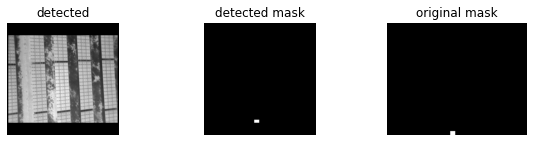

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
#image0=cv2.imread('/content/drive/MyDrive/filename0.jpg')
image1=cv2.imread('/content/drive/MyDrive/filename.jpg')
image2=cv2.imread('/content/drive/MyDrive/filename2.jpg')
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image1)
plt.axis('off')
plt.title("detected mask")

fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(image2)
plt.axis('off')
plt.title("original mask")
